# Rail System Line Trip Estimates

### Gerekli kütüphaneleri yükleme

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

### Veri setini yükleme

In [5]:
data = pd.read_csv('SeferSayıları.csv', thousands=',')

### İlk 100 veri kaydını gösterme

In [6]:
print("Veri setinin ilk 100 kaydı:\n")
print(data.head(100))


Veri setinin ilk 100 kaydı:

        Tarih     M1     M2     M3     M4       M5    M6       M7      M8  \
0    1/1/2017  21575  22479  16561  11762      NaN  7502      NaN     NaN   
1    2/1/2017  19488  20288  15012  10644      NaN  6776      NaN     NaN   
2    3/1/2017  21582  22846  16689  11820      NaN  7650      NaN     NaN   
3    4/1/2017  20870  21680  15967  11413      NaN  7260      NaN     NaN   
4    5/1/2017  21568  22588  16575  11784      NaN  7518      NaN     NaN   
..        ...    ...    ...    ...    ...      ...   ...      ...     ...   
79   8/1/2023  18991  18662   7536  10369  10528.0  7722  16025.0  6434.0   
80   9/1/2023  18101  18286   7521  11100  10875.0  7487  16527.0  6248.0   
81  10/1/2023  18653  19307   7007  11780  11533.0  7699  16838.0  6506.0   
82  11/1/2023  17894  19028   7665  11432  11347.0  7441  15594.0  6267.0   
83  12/1/2023  18545  19478   7984  11779  11778.0  7722  16123.0  6480.0   

        M9     T1     T4      T5     F1      F

### Hat isimlerini alma

In [7]:
stations = data.columns[1:]
stations = stations[:stations.get_loc("TF2")+1]

### ARIMA modelini eğitme

In [8]:
def train_arima_model(data, order):
    model = ARIMA(data, order=order)
    fitted_model = model.fit(start_params=None) 
    return fitted_model

### Tahmin yapma

In [9]:
def make_forecast(model, steps):
    forecast = model.forecast(steps=steps)
    return forecast

### Tahminleri yazdırma

In [10]:
def print_forecast(forecast, dates):
    for date, prediction in zip(dates, forecast):
        print(f"Tarih: {date}, Tahmini Sefer Sayısı: {int(round(prediction))}")

### Tahminleri görselleştirme

In [11]:
def visualize_forecast(data, forecast, station):
    plt.plot(data, label='Mevcut Veriler')
    plt.plot(range(len(data), len(data) + len(forecast)), forecast, label='Tahminler')
    plt.xlabel('Zaman')
    plt.ylabel('Sefer Sayısı')
    plt.title(f'{station} Hattı Tahminleri')
    plt.legend()
    plt.show()

### Tahminler için ARIMA modeli parametreleri

In [12]:
order = (5, 1, 0)
forecast_steps = 12

### Tahminleri saklamak için bir DataFrame oluşturma

In [13]:
forecast_df = pd.DataFrame()

### Tarihler seçme

In [14]:
random_dates = ['2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01']

### Her hat için tahmin yapma


M1 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 18504
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 18507
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 18465
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 18467
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 18465
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 18469
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 18469
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 18469
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 18469


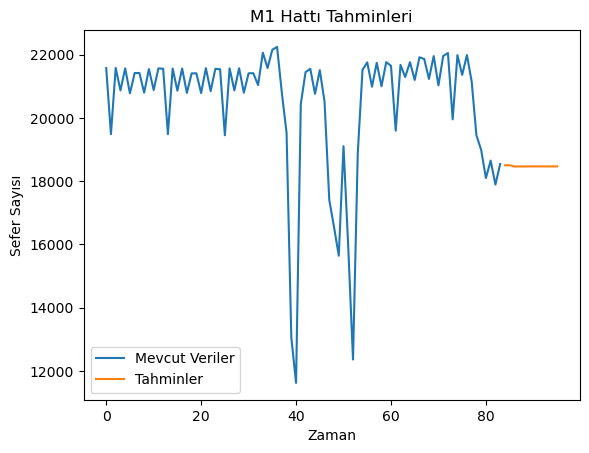


M2 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 19355
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 19340
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 19326
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 19328
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 19337
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 19336
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 19335
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 19334
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 19335


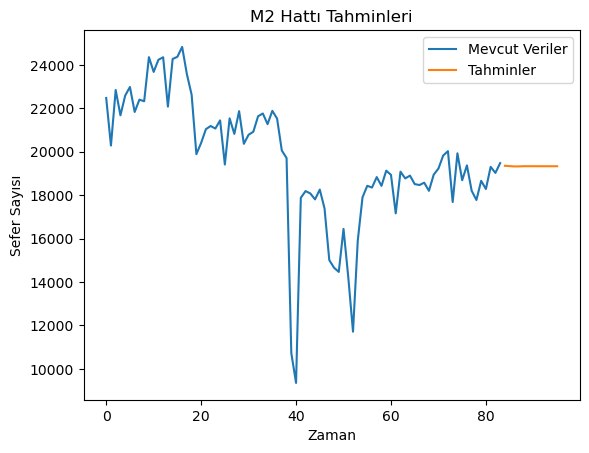


M3 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 8014
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 7996
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 7902
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 7879
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 7879
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 7890
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 7900
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 7902
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 7901


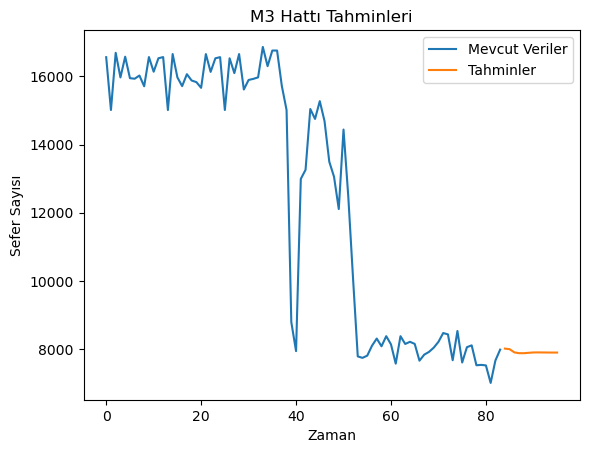


M4 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 11679
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 11637
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 11635
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 11640
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 11647
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 11648
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 11646
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 11645
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 11645


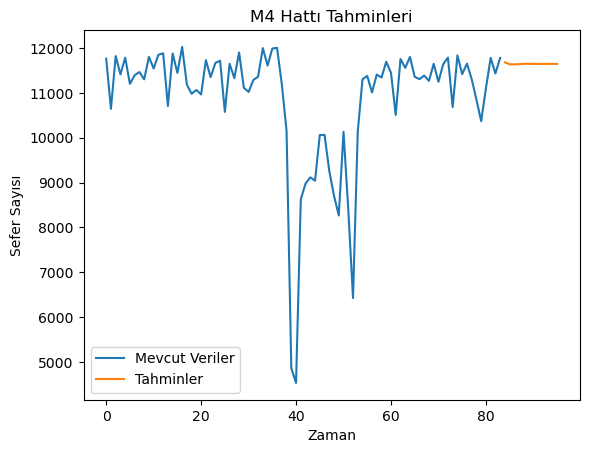


M5 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 11692
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 11574
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 11634
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 11608
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 11647
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 11649
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 11627
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 11633
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 11631


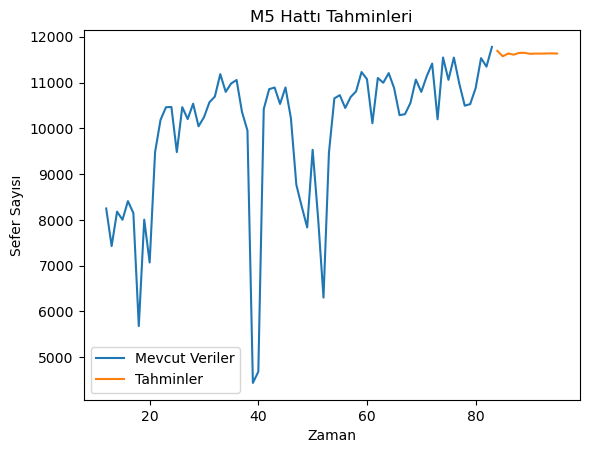


M6 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 7745
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 7679
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 7682
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 7682
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 7676
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 7681
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 7683
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 7682
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 7682


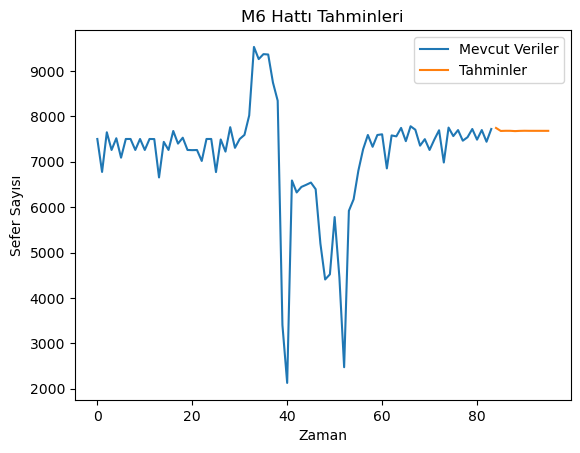


M7 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 16140
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 16211
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 16050
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 16089
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 16108
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 16117
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 16098
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 16099
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 16103


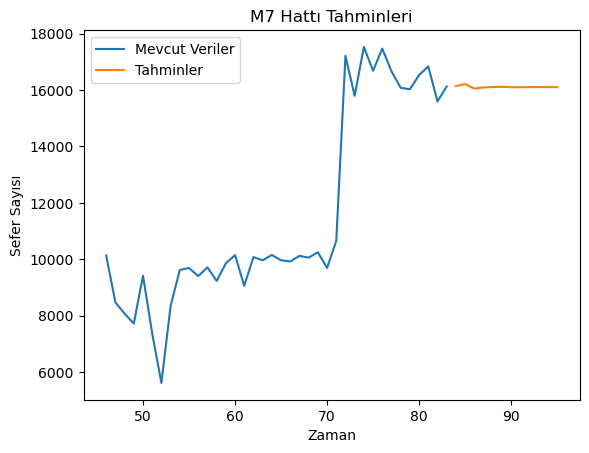


M8 Hattı Tahminleri:



D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tarih: 2024-04-01, Tahmini Sefer Sayısı: 6561
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 6346
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 6641
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 6429
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 6499
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 6664
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 6403
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 6679
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 6547


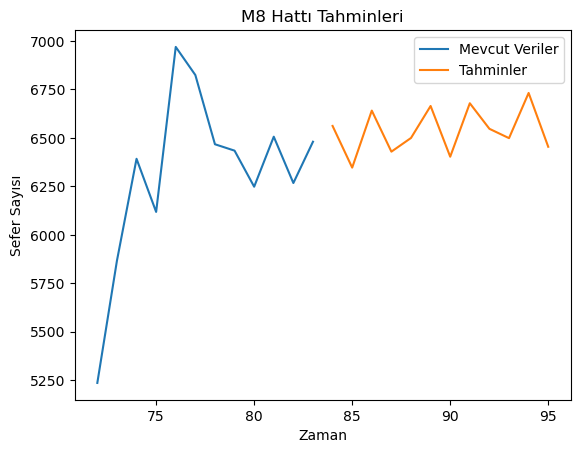


M9 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 6908
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 6862
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 6818
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 6900
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 6857
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 6857
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 6865
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 6865
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 6860


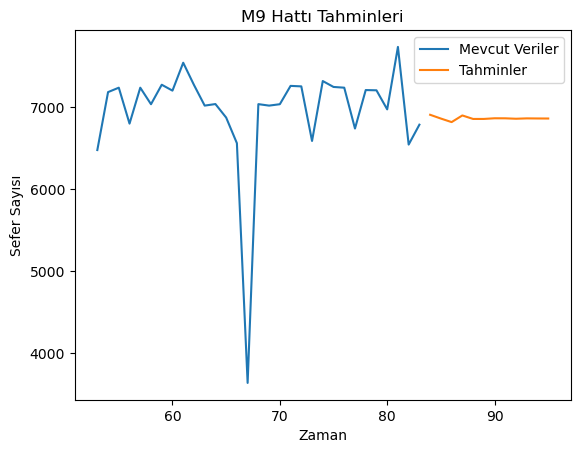


T1 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 22146
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 22168
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 22137
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 22095
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 22092
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 22103
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 22110
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 22109
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 22107


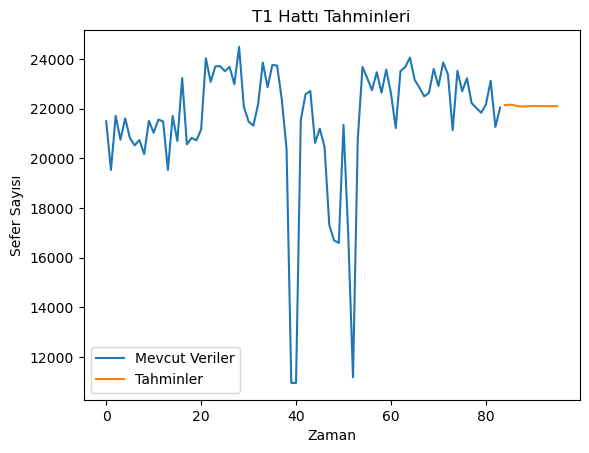


T4 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 12405
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 12341
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 12383
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 12376
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 12385
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 12386
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 12381
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 12381
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 12381


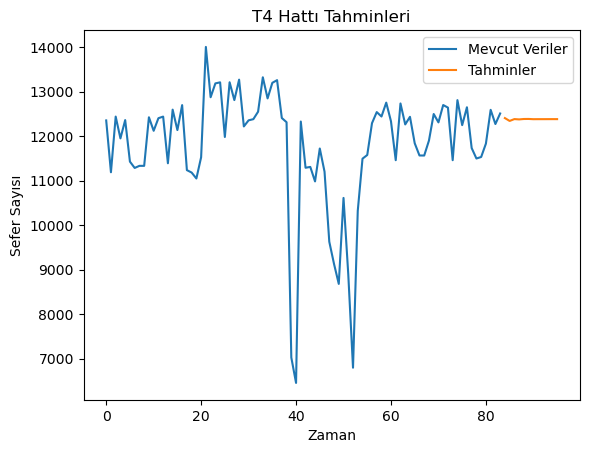


T5 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 7779
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 7895
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 7837
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 7831
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 7932
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 7968
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 7953
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 7931
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 7965


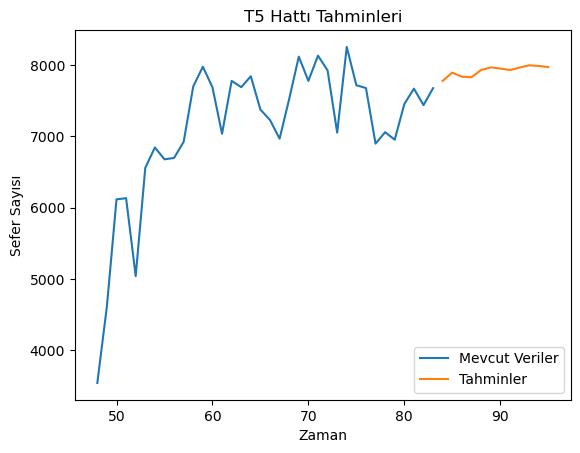


F1 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 10250
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 10039
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 10090
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 10115
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 10096
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 10103
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 10102
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 10100
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 10102


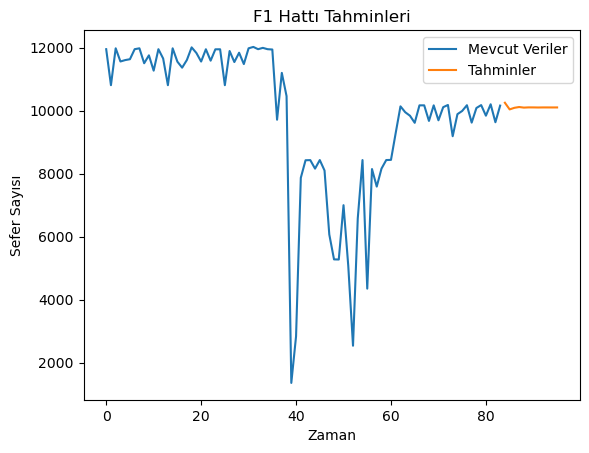


F4 Hattı Tahminleri:



D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tarih: 2024-04-01, Tahmini Sefer Sayısı: 8023
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 8294
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 8189
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 8088
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 8170
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 7985
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 8278
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 7827
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 8150


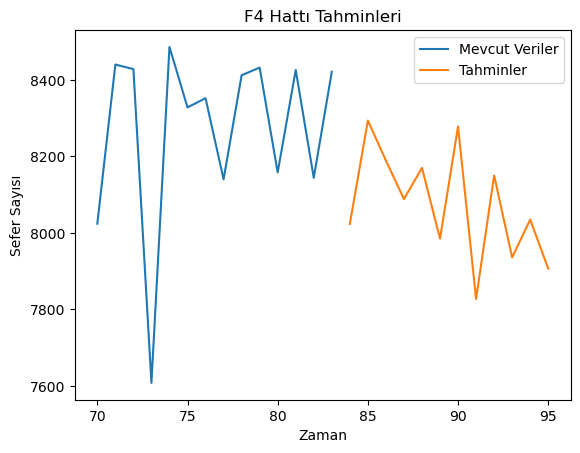


T3 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 2238
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 2239
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 2216
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 2217
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 2206
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 2213
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 2217
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 2221
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 2217


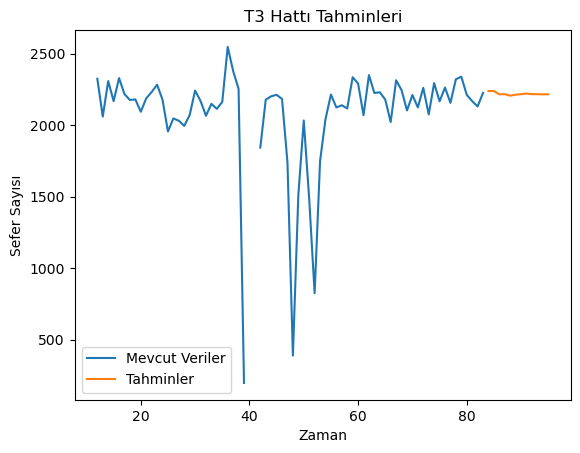


TF1 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 2734
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 3030
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 2972
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 3074
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 2936
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 2973
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 2958
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 3008
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 2984


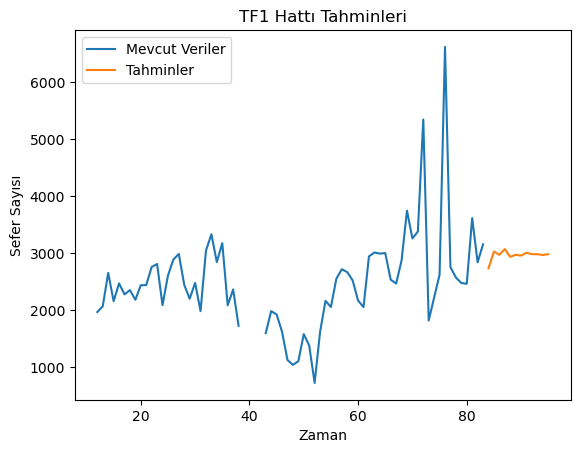


TF2 Hattı Tahminleri:

Tarih: 2024-04-01, Tahmini Sefer Sayısı: 5967
Tarih: 2024-05-01, Tahmini Sefer Sayısı: 5813
Tarih: 2024-06-01, Tahmini Sefer Sayısı: 6139
Tarih: 2024-07-01, Tahmini Sefer Sayısı: 5934
Tarih: 2024-08-01, Tahmini Sefer Sayısı: 5871
Tarih: 2024-09-01, Tahmini Sefer Sayısı: 5965
Tarih: 2024-10-01, Tahmini Sefer Sayısı: 5892
Tarih: 2024-11-01, Tahmini Sefer Sayısı: 5929
Tarih: 2024-12-01, Tahmini Sefer Sayısı: 5951


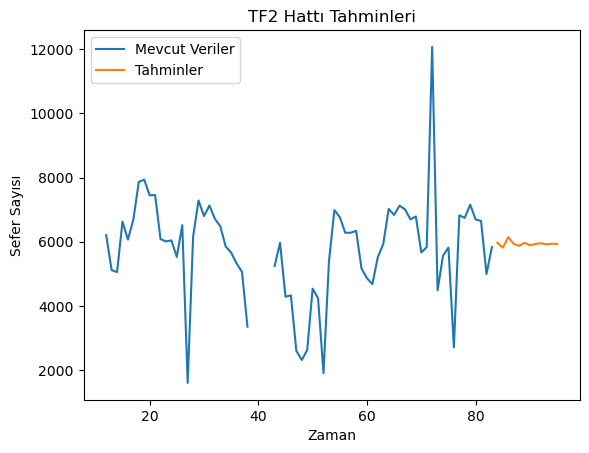

In [15]:
for station in stations:
    print(f"\n{station} Hattı Tahminleri:\n")
    model = train_arima_model(data[station], order=order)
    forecast = make_forecast(model, steps=forecast_steps)
    print_forecast(forecast, random_dates)
    visualize_forecast(data[station], forecast, station)
    forecast_df[station] = forecast

### Hatların tahmin edilen sefer sayılarını karşılaştıran grafik oluşturma

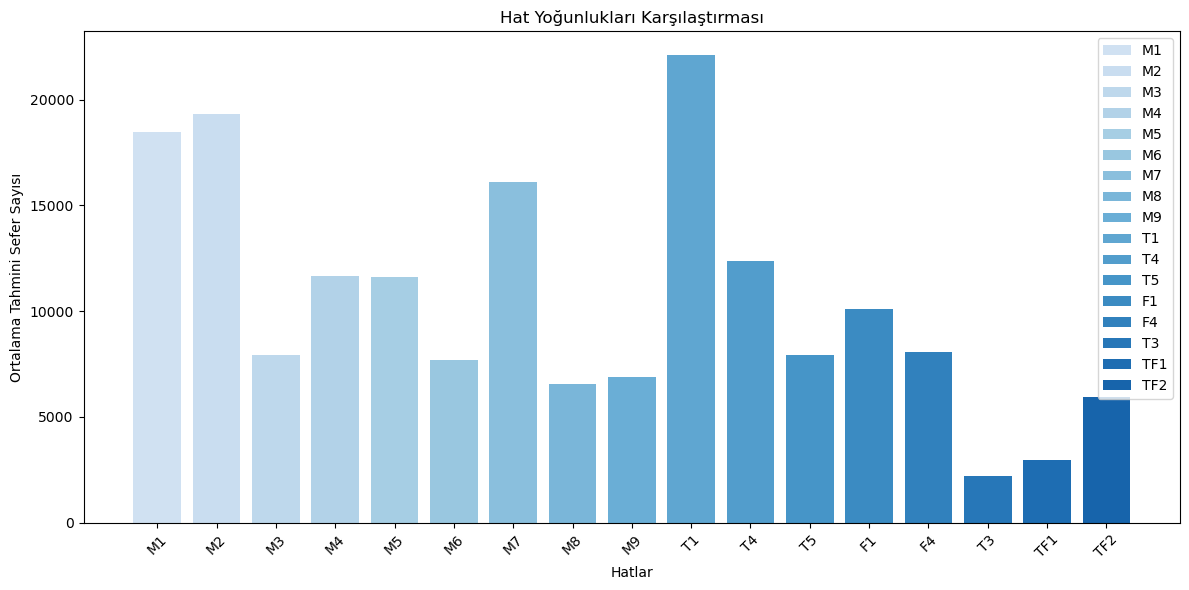

In [16]:
plt.figure(figsize=(12, 6))
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(forecast_df.columns)))  
for i, station in enumerate(forecast_df.columns):
    plt.bar(station, forecast_df[station].mean(), label=station, color=colors[i])
plt.xlabel('Hatlar')
plt.ylabel('Ortalama Tahmini Sefer Sayısı')
plt.title('Hat Yoğunlukları Karşılaştırması')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()